## 1강 : Dataset check

In [200]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [201]:
os.chdir(r'C:\Users\sunny\Desktop\DT\titanic')
df_train  = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [202]:
df_train.head()
#0 = die / 1 = survive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
df_train.shape

(891, 12)

In [205]:
df_test.shape

(418, 11)

In [206]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [207]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [208]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [209]:
#위의 columns를 for문으로
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0])) #format 오른쪽 정렬
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [210]:
df_train['Embarked'].shape[0]

891

In [211]:
#test columns의 null도 확인
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0])) #format 오른쪽 정렬
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


<AxesSubplot:>

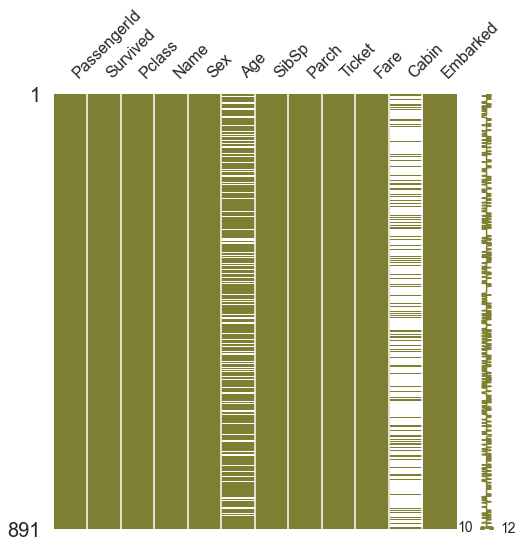

In [212]:
msno.matrix(df = df_train.iloc[:,:], figsize=(8,8), color = (0.5, 0.5, 0.2))
#null data의 분포(위치)

<AxesSubplot:>

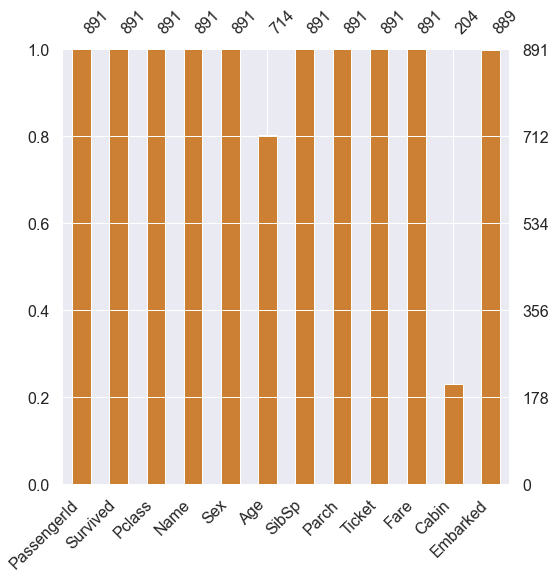

In [213]:
msno.bar(df = df_train.iloc[:,:], figsize=(8,8), color = (0.8, 0.5, 0.2))
#null data의 %

## 2강: EDA - Pclass

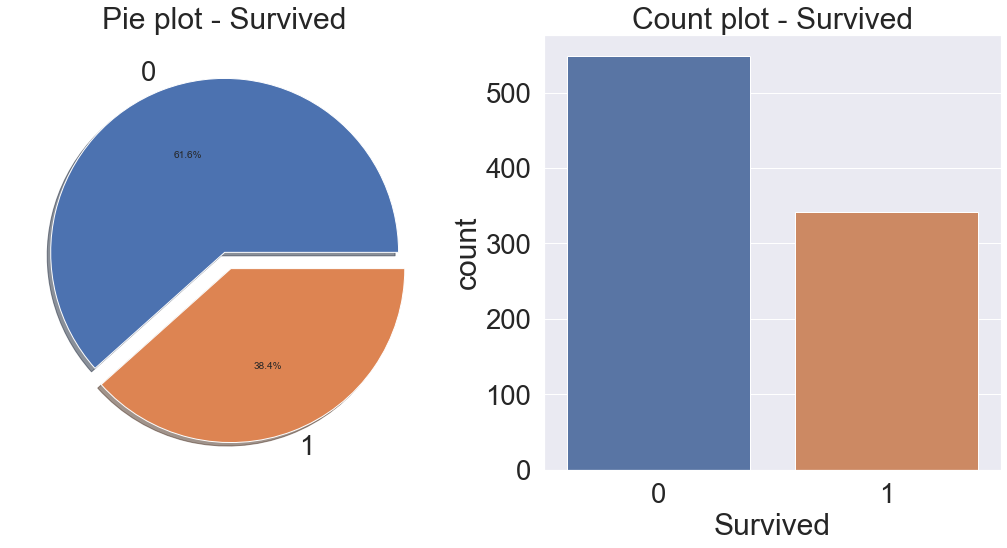

In [214]:
f, ax = plt.subplots(1,2,figsize = (18, 8)) #도화지 (1(row), 2(col) 1행에 2개 그리겠다
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True) # ax = ax[0] 는 위치 index [0]
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

<AxesSubplot:>

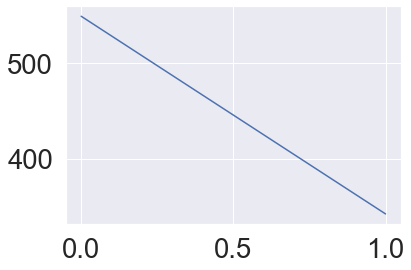

In [215]:
df_train['Survived'].value_counts().plot() # 시리즈 타입은 plot을 가지고 있다. 

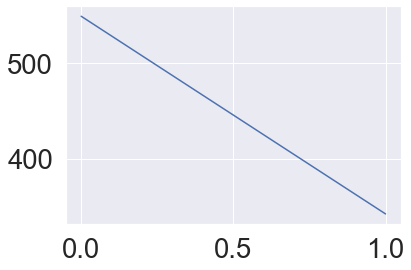

In [216]:
plt.plot(df_train['Survived'].value_counts()) # 이렇게 할 수 도 있다.

<AxesSubplot:title={'center':'Pie Plot Survived'}>

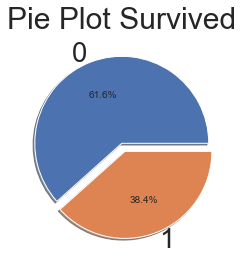

In [217]:
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', shadow=True, ylabel='', title = 'Pie Plot Survived')


<AxesSubplot:>

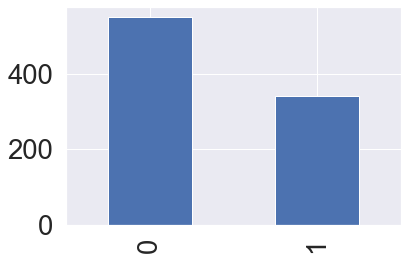

In [218]:
df_train['Survived'].value_counts().plot.bar()

## 2.1 Pclass

In [219]:
#pclass = 카테고리 이면서 순서가 있는 데이터
#Pclass 에 다른 생존률을 확인

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [220]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [221]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='PuBu') #margins=False #color map sheme

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

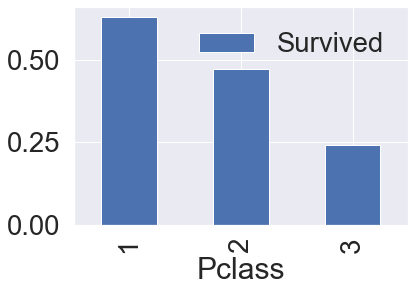

In [222]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()

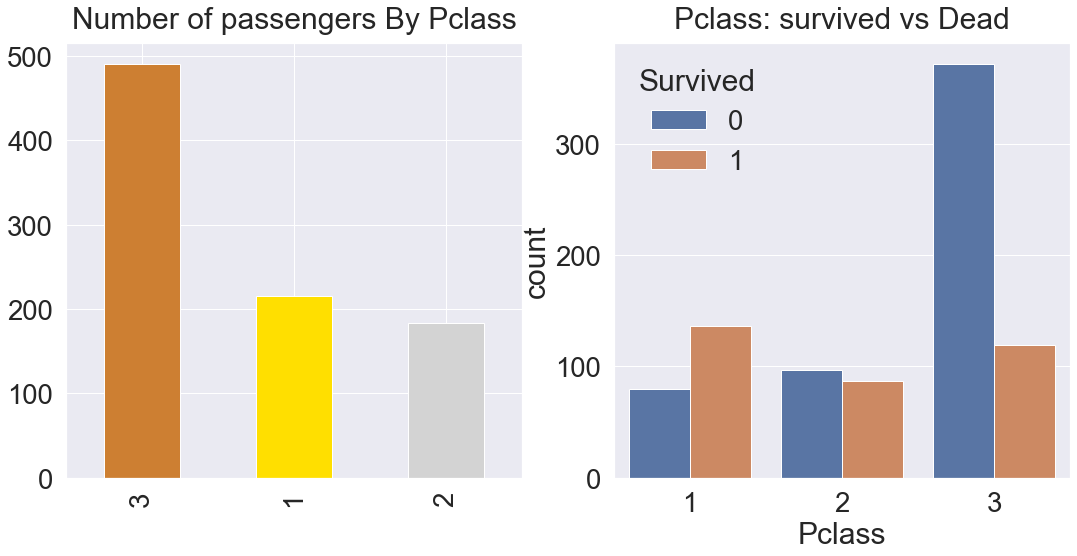

In [223]:
y_position =1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train ['Pclass'].value_counts().plot.bar(color=['#cd7f32', '#ffdf00', '#d3d3d3'], ax = ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel = ('Counts')
sns.countplot('Pclass', hue="Survived", data=df_train, ax=ax[1]) #hue는 색깔을 구분해 주어라(col별로 색을 다르게)
ax[1].set_title('Pclass: survived vs Dead', y = y_position)
plt.show()

## 3강: EDA- Sex

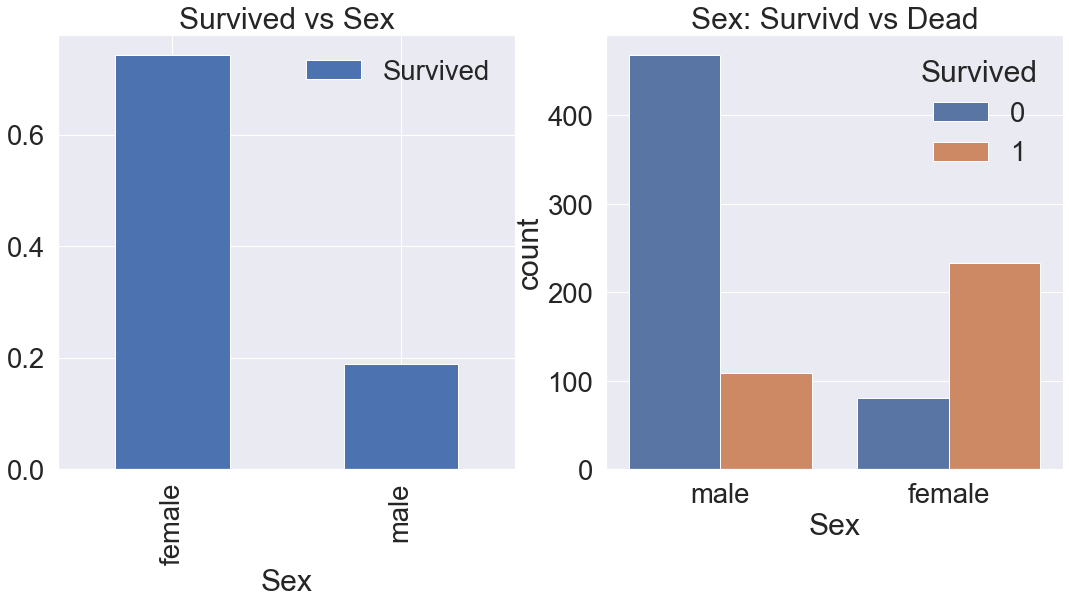

In [224]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survivd vs Dead')
plt.show()

In [225]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [226]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [227]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r') #margins=False #color map sheme

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


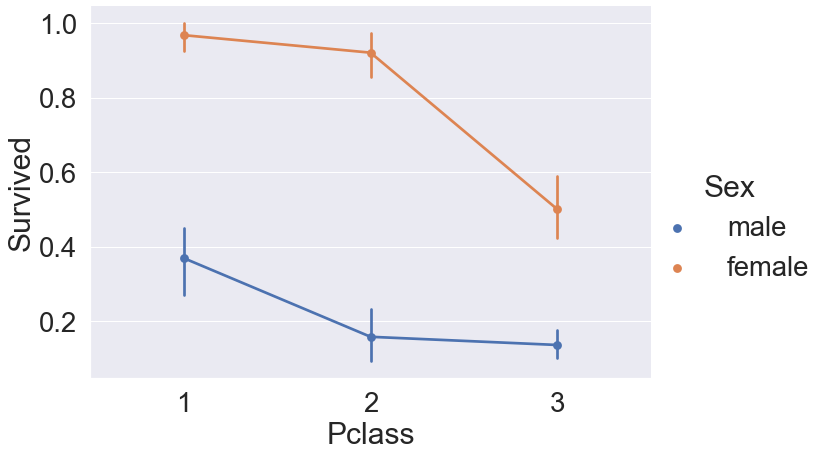

In [228]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=df_train, size = 6, aspect=1.5)

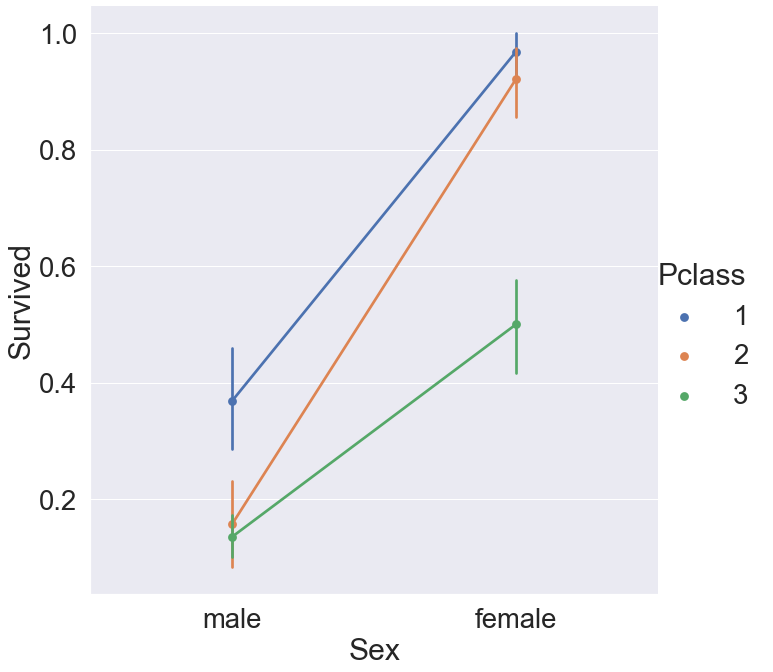

In [229]:
sns.factorplot(x = 'Sex', y='Survived', hue='Pclass', data=df_train, saturation=5, size = 9, aspect=1) #col='Pclass'

## 4강: EDA-Age

In [230]:
print('제일 나이 많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 years
제일 어린 탑승객: 0.4 years
탑승객 평균 나이: 29.7 years


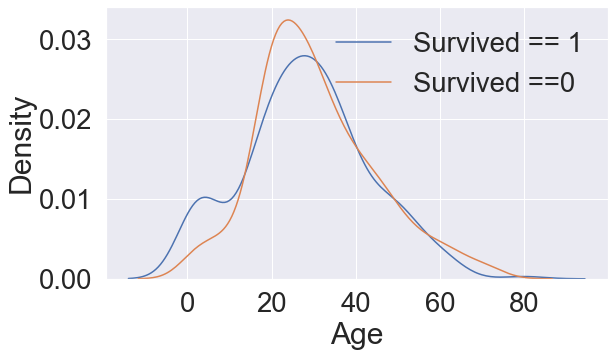

In [231]:
#커널 밀도 추정(KDE: Kernel Density Estimator) 플롯 https://darkpgmr.tistory.com/147
f, ax = plt.subplots(1,1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived ==0'])
plt.show()

<AxesSubplot:>

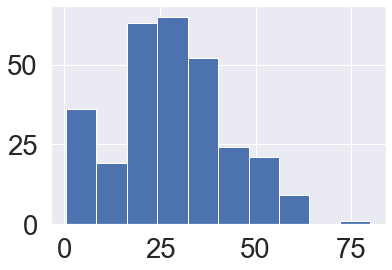

In [232]:
df_train[df_train['Survived'] == 1]['Age'].hist()

In [233]:
#f, ax = plt.subplot(1, 1, figsize = (10,10))


#### plot 도화지를 준비하는 3가지 방법
* f = plt.figure(figsize = (10,10)
* f, ax =plt.subplots(1,1, figsize = (10,10))
* plt.figure(figsize=(10,10))

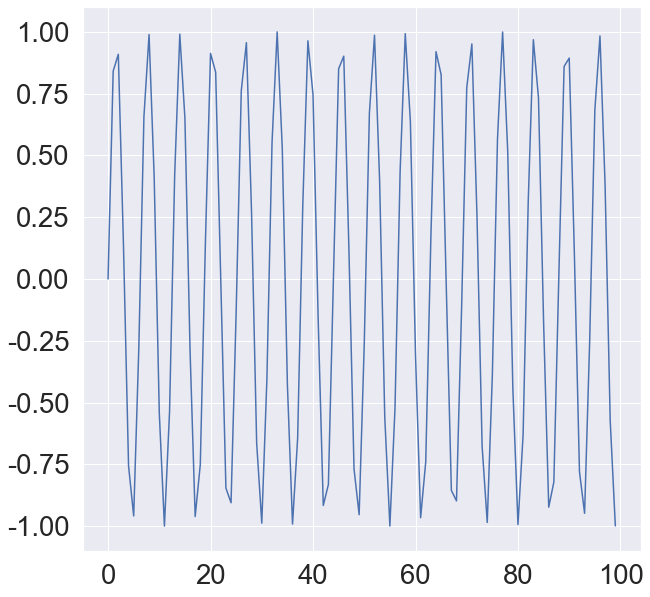

In [234]:
f = plt.figure(figsize=(10,10))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

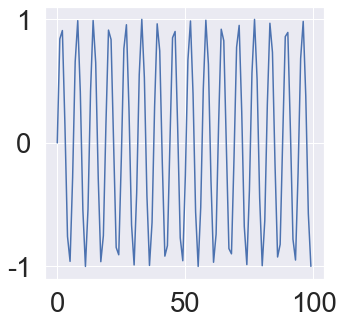

In [235]:
f, ax  = plt.subplots(1,1, figsize = (5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b) # 축을 반환

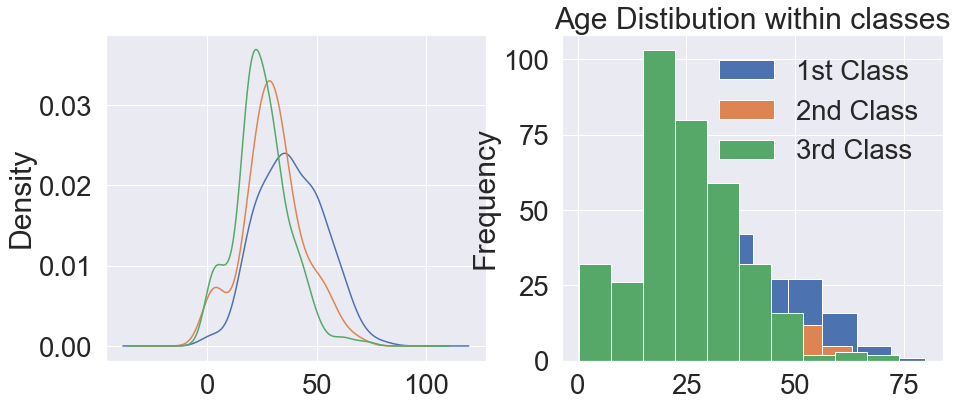

In [236]:
#클래스별 나이분포 / 히스토그램과 kde 그래프 비교

f, ax = plt.subplots(1, 2, figsize = (15,6))
df_train['Age'][df_train['Pclass']== 1].plot(kind = 'kde', ax = ax[0])
df_train['Age'][df_train['Pclass']== 2].plot(kind = 'kde', ax = ax[0])
df_train['Age'][df_train['Pclass']== 3].plot(kind = 'kde', ax = ax[0])

# plt.xlabel('Age')
# plt.title('Age Distibution within classes')
# plt.legend(['1st Class', '2nd Class', '3rd Class'])
# plt.show()

#f, ax = plt.subplots(1, 2, figsize = (15,6))
df_train['Age'][df_train['Pclass']== 1].plot(kind = 'hist', ax = ax[1])
df_train['Age'][df_train['Pclass']== 2].plot(kind = 'hist', ax = ax[1])
df_train['Age'][df_train['Pclass']== 3].plot(kind = 'hist', ax = ax[1])

#plt.xlabel('Age')
plt.title('Age Distibution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

In [237]:
# plt.figure(figsize = (8,6))
# df_train['Age'][df_train['Pclass']== 1].plot(kind = 'hist')
# df_train['Age'][df_train['Pclass']== 2].plot(kind = 'hist')
# df_train['Age'][df_train['Pclass']== 3].plot(kind = 'hist')

# plt.xlabel('Age')
# plt.title('Age Distibution within classes')
# plt.legend(['1st Class', '2nd Class', '3rd Class'])
# plt.show()

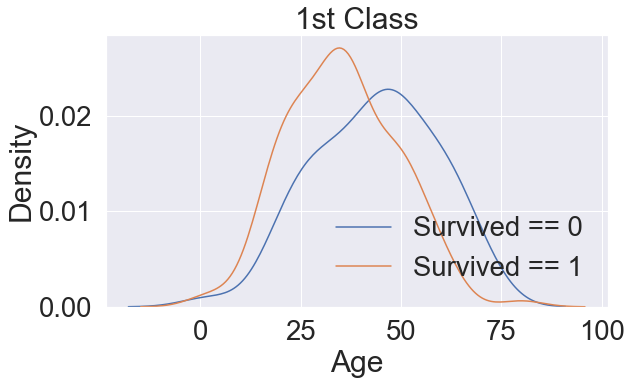

In [238]:
#클래스별 생존률

fig, ax = plt.subplots(1, 1,figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0)&(df_train['Pclass']== 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1)&(df_train['Pclass']== 1)]['Age'], ax = ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st Class')
plt.show()

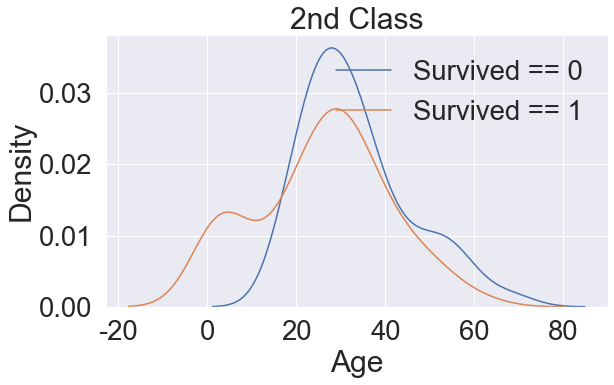

In [239]:
#클래스별 생존률

fig, ax = plt.subplots(1, 1,figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0)&(df_train['Pclass']== 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1)&(df_train['Pclass']== 2)]['Age'], ax = ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2nd Class')
plt.show()

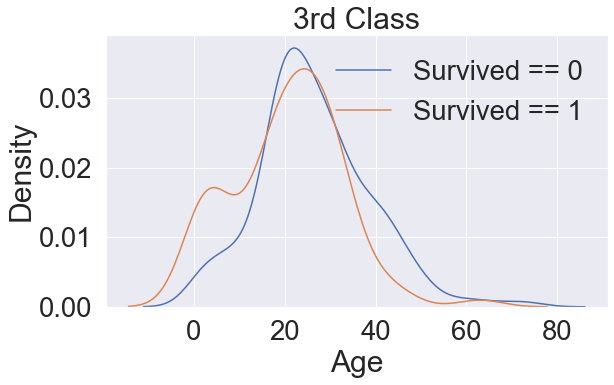

In [240]:
fig, ax = plt.subplots(1, 1,figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0)&(df_train['Pclass']== 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1)&(df_train['Pclass']== 3)]['Age'], ax = ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3rd Class')
plt.show()

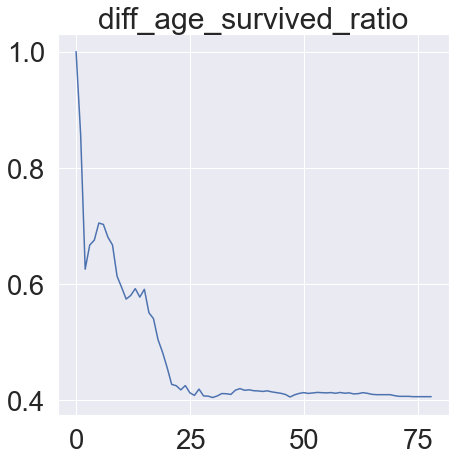

In [241]:
diff_age_survived_ratio = []

for i in range(1,80):
    diff_age_survived_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()/len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(diff_age_survived_ratio)   
plt.title('diff_age_survived_ratio')
plt.ylabel = ('Survived rate')
plt.xlabel = ('Range of Age(0-x)')
plt.show()

In [242]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum()

38

In [243]:
len(df_train[df_train['Age'] < i]['Survived'])

62

## 05강. Sex, Age (바이올린plot)

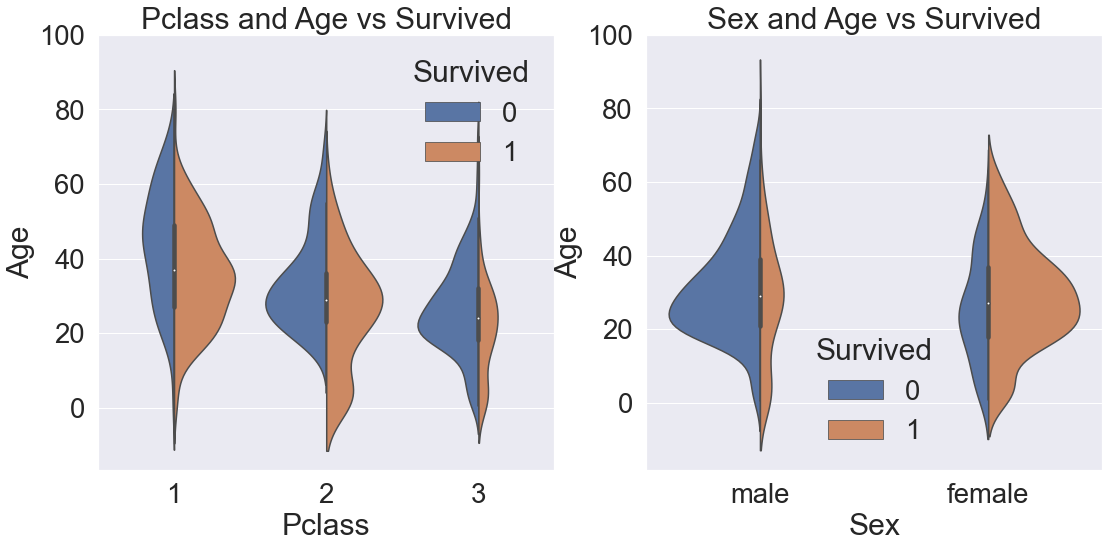

In [244]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data= df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,20))
sns.violinplot('Sex', 'Age', hue = 'Survived', data= df_train, scale='count', split=True, ax=ax[1] )
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,20))
plt.show()

## 06강. Embarked

<AxesSubplot:xlabel='Embarked'>

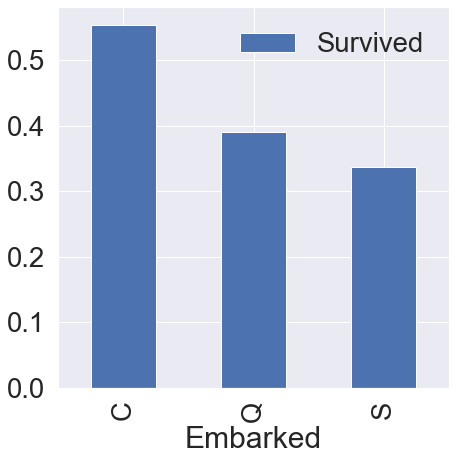

In [245]:
f, ax = plt.subplots(1, 1, figsize=(7,7,))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending=False).plot.bar(ax=ax)

In [246]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


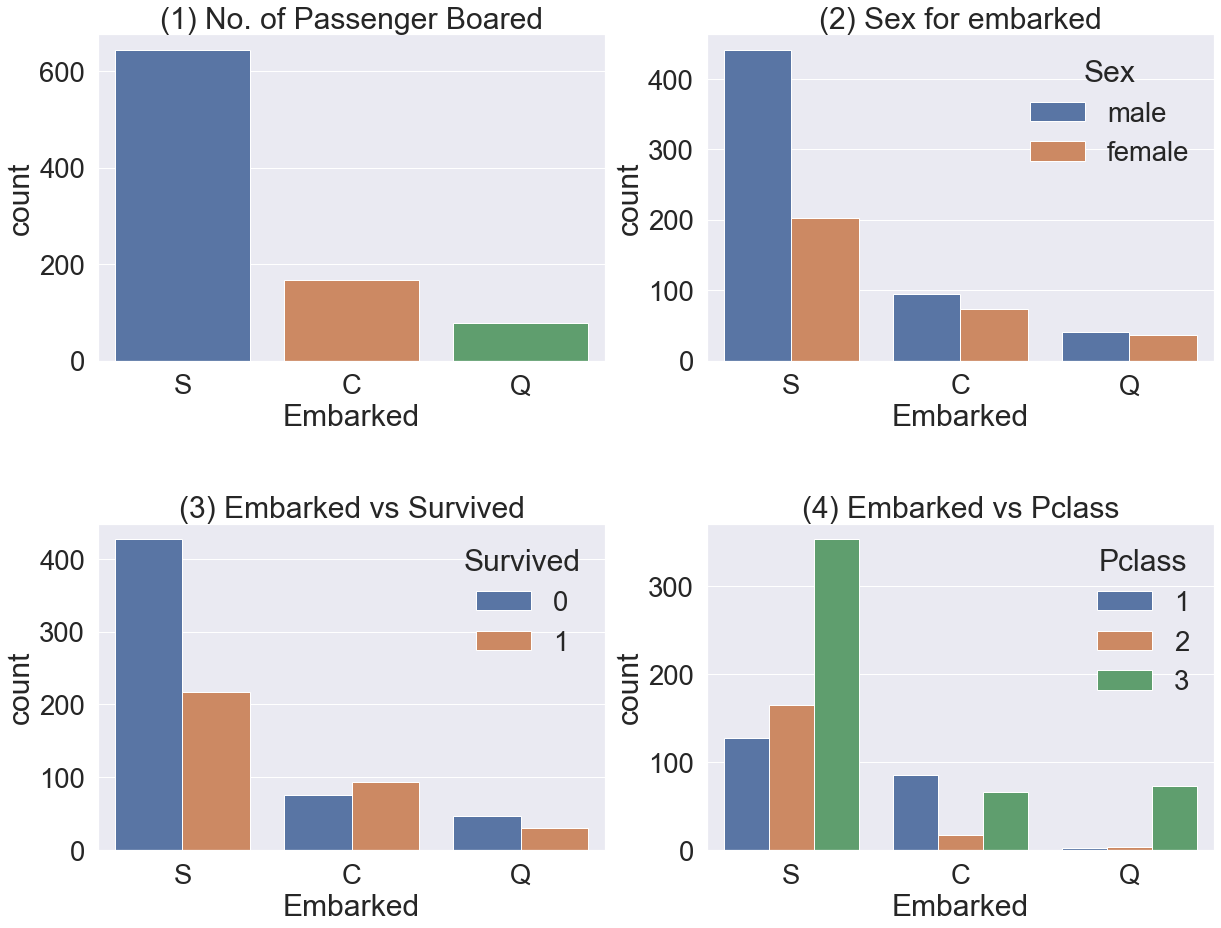

In [247]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passenger Boared')

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Sex for embarked')

sns.countplot('Embarked', hue = 'Survived', data = df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 07강. famillysize

In [248]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [250]:
#famillysize = sibsp+Parch : Series는 연산 가능 (list의 특성과 유사)

df_train['FamillySize'] = df_train['SibSp']+df_train['Parch']+1

print('Maxium size of Familly: ', df_train['FamillySize'].max())
print('Minum size of Familly: ', df_train['FamillySize'].min())

Maxium size of Familly:  11
Minum size of Familly:  1


In [251]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [252]:
df_test['FamillySize'] = df_test['SibSp']+df_test['Parch']+1

In [253]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


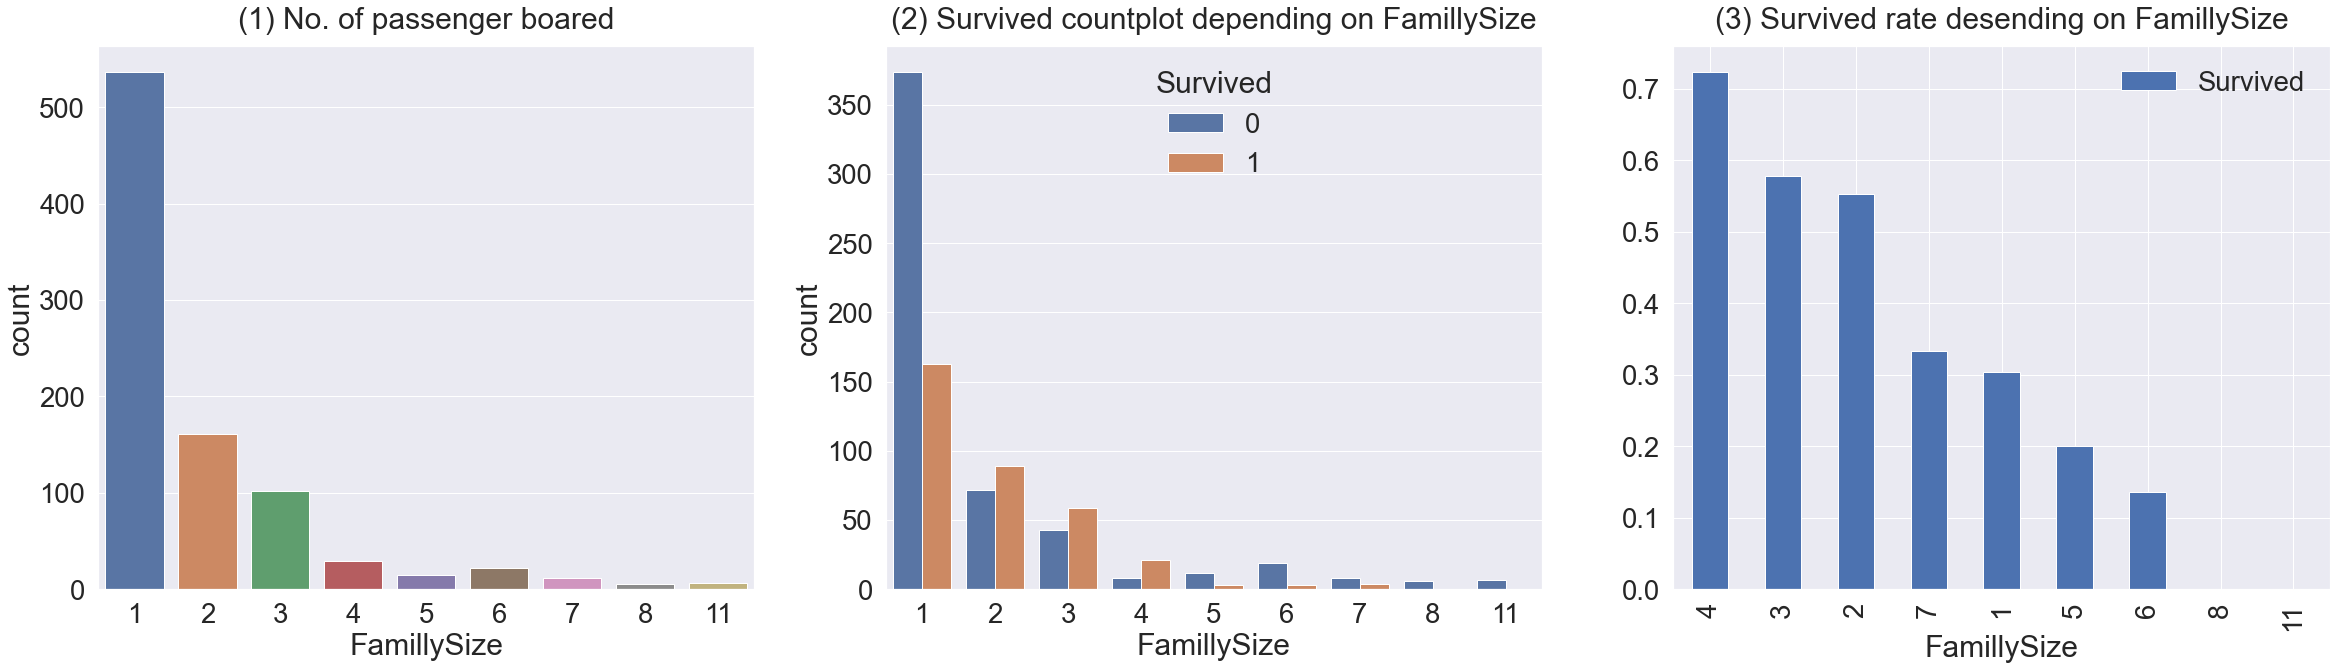

In [254]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamillySize', data = df_train, ax=ax[0])
ax[0].set_title('(1) No. of passenger boared', y =1.02)

sns.countplot('FamillySize', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamillySize', y =1.02)

df_train[['FamillySize', 'Survived']].groupby(['FamillySize'],as_index = True).mean().sort_values(by = 'Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate desending on FamillySize', y =1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

## 08강.fare

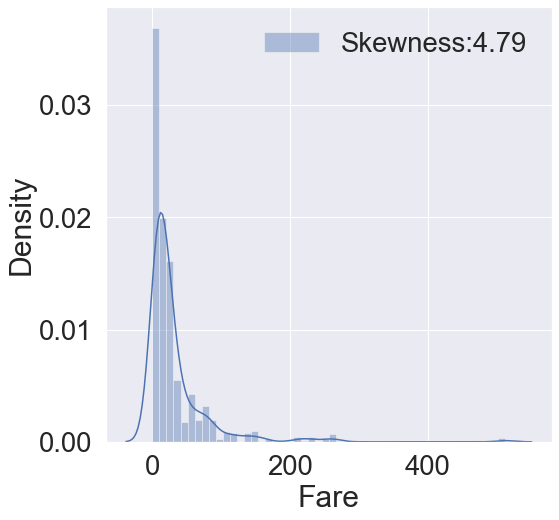

In [255]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label="Skewness:{:.2f}" .format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [256]:
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)

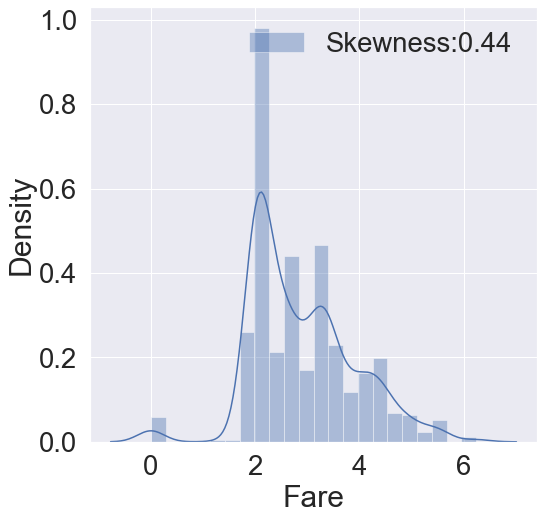

In [257]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label="Skewness:{:.2f}" .format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [258]:
#ticket

df_train['Ticket'].value_counts()

CA. 2343      7
347082        7
1601          7
347088        6
3101295       6
             ..
364848        1
SCO/W 1585    1
2672          1
A/5 21172     1
347062        1
Name: Ticket, Length: 681, dtype: int64

In [259]:
df_train['Ticket'].unique

<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

## 9강. feature engineering

In [260]:
df_train['Age'].isnull().sum()

177

In [261]:
#정규표현식을 사용하여 mr,miss를 분리해 냄
df_train['initial']=df_train['Name'].str.extract('([A-Za-z]*)\.') 
df_test['initial']=df_test['Name'].str.extract('([A-Za-z]*)\.') 

In [262]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [263]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs


In [264]:
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') 

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [265]:
df_train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [266]:
df_test['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [267]:
df_train.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamillySize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='initial'>

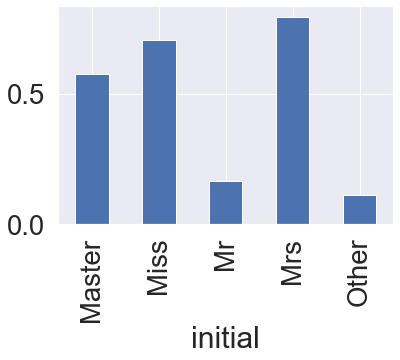

In [268]:
df_train.groupby('initial')['Survived'].mean().plot.bar() #Master = child

In [269]:
df_all = pd.concat([df_train, df_test])
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,1,Mr


In [270]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,1,Mr


In [271]:
df_all.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamillySize
initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.384615


In [272]:
df_train.loc[df_train['Survived'] ==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


In [273]:
(df_train['Age'].isnull())&(df_train['initial'] =='Mr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [274]:
df_train.loc[(df_train['Age'].isnull())&(df_train['initial'] =='Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull())&(df_train['initial'] =='Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull())&(df_train['initial'] =='Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull())&(df_train['initial'] =='Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull())&(df_train['initial'] =='Other'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull())&(df_test['initial'] =='Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull())&(df_test['initial'] =='Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull())&(df_test['initial'] =='Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull())&(df_test['initial'] =='Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull())&(df_test['initial'] =='Other'), 'Age'] = 45

In [275]:
df_train.loc[(df_train['Age'].isnull())&(df_train['initial'] =='Mr'), 'Age']

Series([], Name: Age, dtype: float64)

In [276]:
df_train.loc[(df_train['initial'] == 'Mr'), 'Age']

0      22.0
4      35.0
5      33.0
6      54.0
12     20.0
       ... 
881    33.0
883    28.0
884    25.0
889    26.0
890    32.0
Name: Age, Length: 529, dtype: float64

In [277]:
df_train['Age'].isnull().sum()

0

In [278]:
df_test['Age'].isnull().sum()

0

## 10강, Embarked

In [279]:
df_train['Embarked'].isnull().sum() #가장 많은 데이터로 채워주기

2

In [280]:
df_train['Embarked'].fillna('S', inplace=True)

In [281]:
df_train['Embarked'].isnull().sum()

0

In [282]:
df_train['Age_cat'] = 0

In [283]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [284]:
df_train.loc[df_train['Age']<10,'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age']<20),'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age']<30),'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age']<40),'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age']<50),'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age']<60),'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age']<70),'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'],'Age_cat'] = 7

In [285]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [286]:
def category_age(x):
    if x <10:
        return 0
    elif x <20:
        return 1
    elif x <30:
        return 2
    elif x <40:
        return 3
    elif x <50:
        return 4
    elif x <60:
        return 5
    elif x <70:
        return 6
    else:
        return 7


In [287]:
df_train['Age_cat2'] = df_train['Age'].apply(category_age)

In [288]:
(df_train['Age_cat'] == df_train['Age_cat2']).all() #any()는 하나라도 같으면 True반환, 따라서 전체가 같은지 확인 하려면 all()을 쓴다 하나라도 다르면 False

True

In [289]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat,Age_cat2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3,3


In [290]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs


In [291]:
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [292]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs,2


In [293]:
df_train.drop(['Age', 'Age_cat2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [294]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,3,Mrs,2


In [295]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


## 11강. Feature engineering - Change string to categorical and Pearson coefficient
#### -스트링 데이터를 수치데이터로 치환

In [296]:
df_train['initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [297]:
df_train['initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: initial, dtype: int64

In [298]:
df_train['initial'] = df_train['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['initial'] = df_test['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [299]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [300]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [301]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2 })
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2 })

In [302]:
df_train['Embarked'].isnull().sum()

0

In [303]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [304]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

In [305]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [306]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare','Embarked','FamillySize', 'initial','Age_cat']]

In [307]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamillySize,initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamillySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


<AxesSubplot:title={'center':'Pearson Correalation of Feature'}>

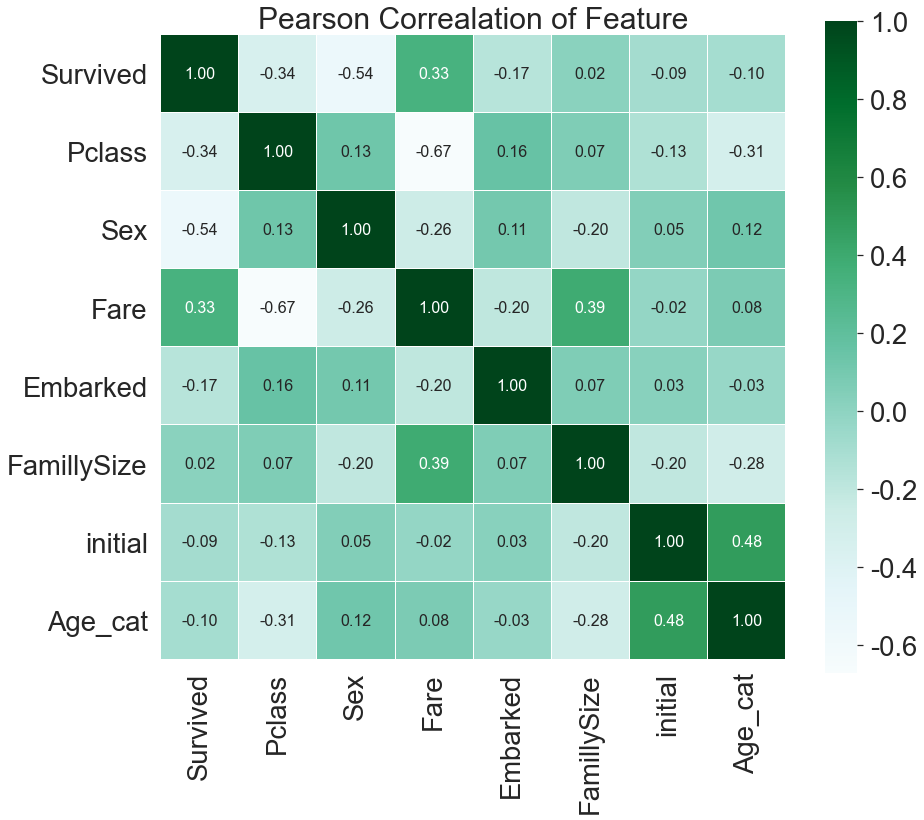

In [308]:
#feature의 상관과계 보기 피어슨 상관관계 히트맵

colormap = plt.cm.BuGn
plt.figure(figsize=(14,12))
plt.title('Pearson Correalation of Feature')
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

## 12강.one-hot 인코딩

In [309]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [310]:
df_train = pd.get_dummies(df_train, columns=['initial'], prefix='initial')
df_test= pd.get_dummies(df_test, columns=['initial'], prefix='initial')

In [311]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [312]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis = 1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis = 1, inplace=True)

In [313]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamillySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [314]:
df_test.head()

,Pclass,Sex,Fare,FamillySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6,0,0,1,0,0,0,1,0
3,3,1,8.6625,1,2,0,0,1,0,0,0,0,1
4,3,0,12.2875,3,2,0,0,0,1,0,0,0,1


In [367]:
df_test = df_test.fillna(df_test['Fare'].mean())

In [368]:
df_test.isnull().sum()

Pclass         0
Sex            0
Fare           0
FamillySize    0
Age_cat        0
initial_0      0
initial_1      0
initial_2      0
initial_3      0
initial_4      0
Embarked_0     0
Embarked_1     0
Embarked_2     0
dtype: int64

## 13. Model development - Machine learningl(Randomforest)

In [315]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [369]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [317]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018 )

In [318]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [319]:
prediction = model.predict(X_vld)

In [320]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [321]:
print('총 {}명중 {:.2f}% 정확도로 생존 맞춤'. format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명중 82.09% 정확도로 생존 맞춤


In [322]:
(prediction == y_vld).sum() / prediction.shape[0]

0.8208955223880597

## 14.feature importance and prediction on test set
* feature importance (변수 중요도)

In [323]:
model.feature_importances_

array([0.09779009, 0.11284497, 0.31832256, 0.09921227, 0.12172176,
       0.01010669, 0.03271866, 0.13912472, 0.02167483, 0.00452316,
       0.01359764, 0.01218007, 0.01618257])

In [324]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'FamillySize', 'Age_cat',
       'initial_0', 'initial_1', 'initial_2', 'initial_3', 'initial_4',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [325]:
df_test.columns

Index(['Pclass', 'Sex', 'Fare', 'FamillySize', 'Age_cat', 'initial_0',
       'initial_1', 'initial_2', 'initial_3', 'initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [326]:
from pandas import Series

In [327]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

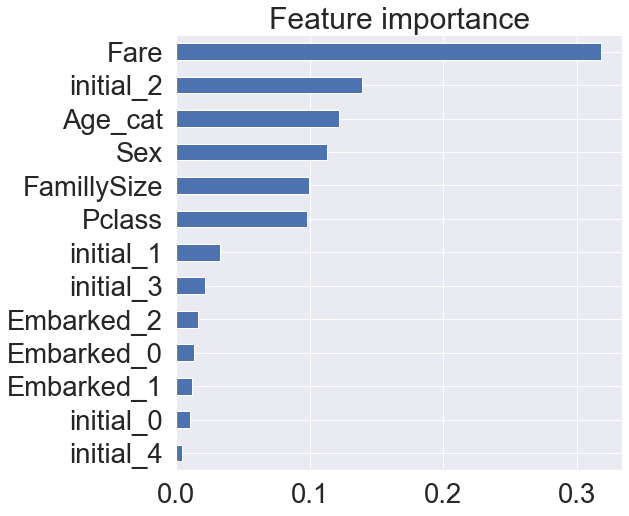

In [332]:
plt.figure(figsize = (8, 8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.title('Feature importance')
#plt.ylabel('Feature')
plt.show()


In [334]:
submission = pd.read_csv(r'C:\Users\sunny\Desktop\DT\titanic\gender_submission.csv')

In [335]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [370]:
prediction = model.predict(X_test)

In [371]:
submission['Survived'] = prediction

In [372]:
submission.to_csv('my_first_submission', index=False)

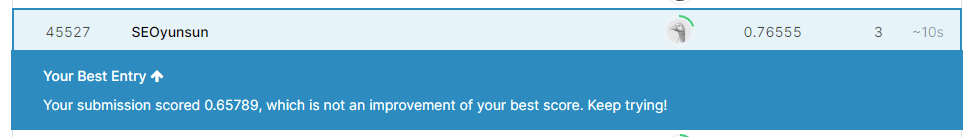

In [376]:
from IPython.display import Image, display
display(Image(filename=r'C:\Users\sunny\Desktop\DT\titanic\Titanic _ Kaggle .png', embed=True))

the end
* https://www.youtube.com/playlist?list=PLC_wC_PMBL5MnqmgTLqDgu4tO8mrQakuF